# Logistic Regression (binary classification)


## Hypothesis space
- Samples of dimension $ d $ 
- Linearly separable  
$ \implies $ $h_w(x)$ produces a linear discriminant of dimension $ d-1 $ (eg with two features we'll have a line) expressed as $ w^Tx = 0$ 
- Specifically we use the sigmoid function: $h_w(x) = g(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

**So how do we predict**
- Supposing we have two classes, 0 and 1  
- By imposing a threshold at - let's say - 0.5
  - If $g(w^Tx) \geq 0.5$ then we predict class 1
  - If $g(w^Tx) < 0.5$ then we predict class 0
- That corresponds 

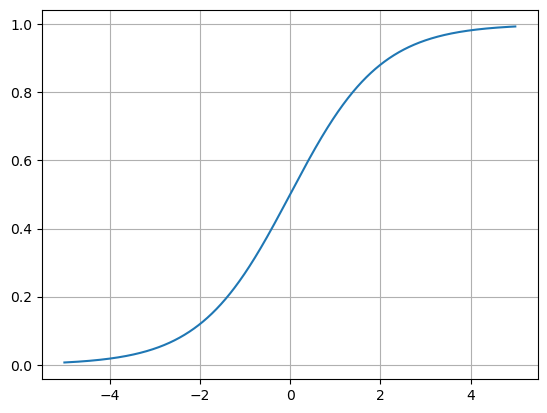

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def logisticFunction(t):
    return 1/(1+np.exp(-t))

t = np.arange(-5,5,0.01)
y = logisticFunction(t)

plt.plot(t,y); plt.grid()

## How do we fit $w$ ?

### Likelihood 
- $ l(w) = p(y|x) = (h_w(x))^y * (1-h_w(x))^{1-y} $ where $y$ can be either $0$ or $1$
- In words, given certain features, $y$ is $1$ with probability $h_w(x)$ and $0$ with probability $1-h_w(x)$

**Using maximum likelihood**
- At each step we update the weights in the direction of the gradient of the likelihood function, maximising it  
- Udate rule : $w_j = w_j + \alpha \frac{\partial l}{\partial w_j} = w_j + \alpha (y - h_w(x))x_j $ 
- We would reach the same result by considering a squared error as loss function

### Loss function
$ L(w) = \begin{cases} -log(h_w(x)) & \text{if} & y = 1 \\ -log(1 - h_w(x)) & \text{if} & y = 0 \end{cases}$  
OR ALSO  
$ L(w) = y(-log(h_w(x))) + (1-y)(-log(1 - h_w(x))) $ 

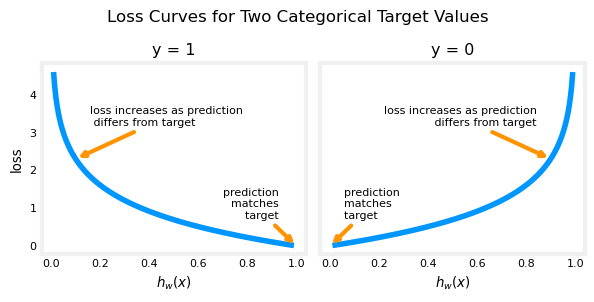

In [2]:
from toolbox.plotting import *
plotTwoLogLosses()

In [3]:
from toolbox.datamodule import *
import torch
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names
# https://archive.ics.uci.edu/datasets

# load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# features = ["age","opYear","nodes","class"]
# dataset = DataLoader(url, features, num_train = 256, num_val = 50, batch_size = 16)
# dataset.summarize()
# print(dataset.dataframe)

In [5]:
from toolbox.datamodule import *
import pandas as pd

# load the dataset
dataframe = pd.read_csv("../data/diabetes_prediction_dataset.csv")
dataframe.head()

# dataset = DataLoader(path = "diabetes_prediction_dataset.csv", num_train = 256, num_val = 50, batch_size = 16)
# dataset.summarize()
# print(dataset.dataframe)

gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [3]:
from toolbox.models import *
from toolbox.trainer import *
from toolbox.datamodule import *

data = DataLoader(txtfile = "../data/log_reg.txt")
print("First five elements in X_train are:\n", data.X[:5])
print("Type of X_train:",type(data.X))
data.summarize()

model = LogisticRegressionScratch(input_dim = 2, lr=0.0015)
# model = LogisticRegression(3, lr=0.01)
trainer = TrainerScratch(max_epochs = 500000)
trainer.fit(model,data)

First five elements in X_train are:
 tensor([[34.6237, 78.0247],
        [30.2867, 43.8950],
        [35.8474, 72.9022],
        [60.1826, 86.3086],
        [79.0327, 75.3444]])
Type of X_train: <class 'torch.Tensor'>
N Examples: 100
N Inputs: 2
N Classes: 2
Classes: [0. 1.]
 - Class 0.0: 40 (40.0)
 - Class 1.0: 60 (60.0)
Loss at epoch 1: 486.97894287109375

Loss at epoch 2: 30.602462768554688

Loss at epoch 3: 30.587505340576172

Loss at epoch 4: 30.57633399963379

Loss at epoch 5: 30.568796157836914

Loss at epoch 6: 30.563175201416016

Loss at epoch 7: 30.559144973754883

Loss at epoch 8: 30.55609130859375

Loss at epoch 9: 30.553800582885742

Loss at epoch 10: 30.552032470703125

Loss at epoch 11: 30.550655364990234

Loss at epoch 12: 30.54956817626953

Loss at epoch 13: 30.548704147338867

Loss at epoch 14: 30.548009872436523

Loss at epoch 15: 30.54744529724121

Loss at epoch 16: 30.54698371887207

Loss at epoch 17: 30.54660415649414

Loss at epoch 18: 30.546287536621094

Loss at

KeyboardInterrupt: 

# Perceptron (binary classification)

## Hypothesis space
- Same linear discriminant as logistic regression
- But the $h_w(x)$ is different, namely

 $ h_w(x) = g(w^Tx) = \begin{cases} 1 & \text{if} & w^Tx \geq 0 \\ 0 & \text{if} & w^Tx < 0 \end{cases}$ 

- So perceptron is basically logistic regression with a linear decision boundary

**So how do we predict?**

- We predict by projecting the samples on the vector of weights and looking at the sign of that number $wx$
- Looking at the sign and deciding is the actication function (which is nonlinear)

## How do we fit $w$ ?
- We can use squared loss $ E = \frac{1}{2} \sum_{i=1}^n (y_i - wx_i)^2 $

**Using gradient descent**
- At each step we update the weights in the direction of the negative gradient of the loss function
- Same update rule as with logistic regression
